## California housing dataset evaluation

In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("/Users/brianshimmer/Desktop/Data science training/Data science training/Data science training/california housing dataset/housing.csv")

In [5]:
target="median_house_value"

### Basic exploration of data

In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
data.shape

(20640, 10)

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# Distribution plots

import matplotlib.pyplot as plt
import seaborn as sns


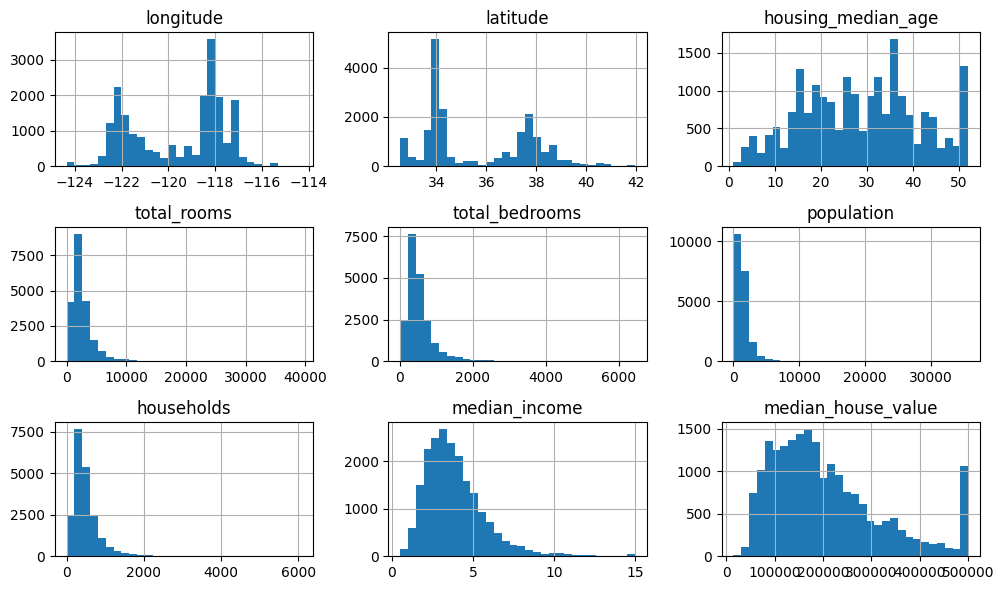

In [12]:
data.hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.show()

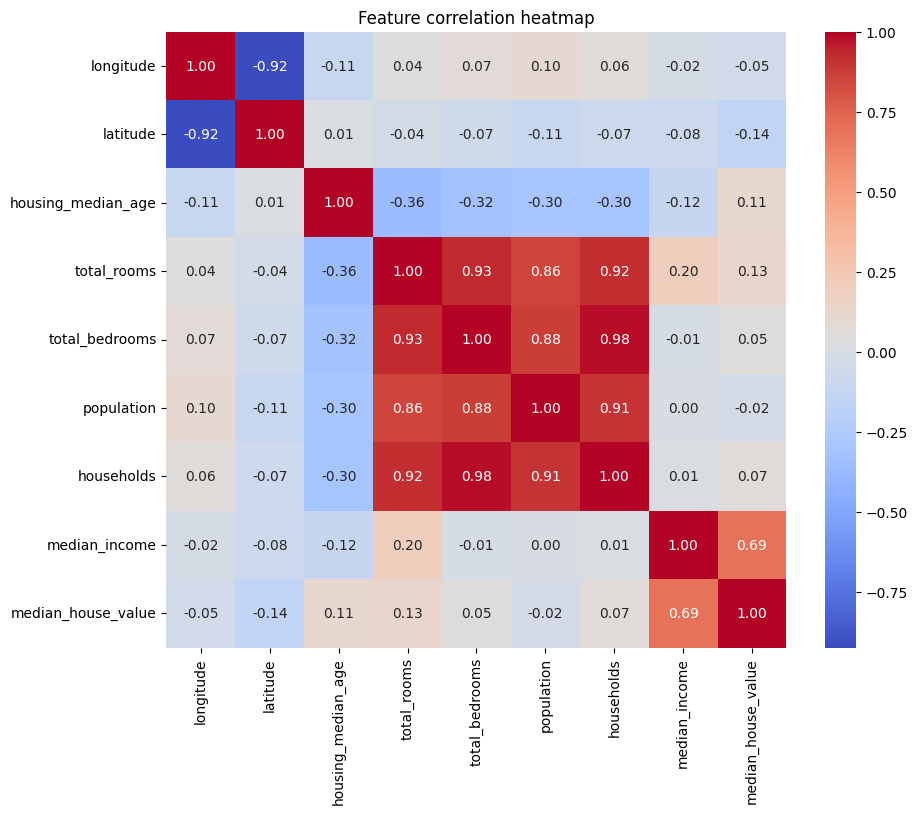

In [13]:
# correlation heatmap

numerical_features=data.select_dtypes(include=['int64','float64'])
num_cols=data.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(10,8))
sns.heatmap(numerical_features.corr(), annot=True, fmt=".2f",cmap="coolwarm")
plt.title("Feature correlation heatmap")
plt.show()

In [14]:
#correlation with target variable

numerical_features.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### Data cleaning and preprocessing

In [16]:
# checking missing values

data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# treating missing values
from sklearn.impute import SimpleImputer


imputer=SimpleImputer()
data[num_cols]=imputer.fit_transform(data[num_cols])

In [18]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
# Detecting outliers

def det_outliers(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound, upper_bound

lower, upper=det_outliers(data[num_cols])
    

In [20]:
# outlier counts per feature

outlier_counts=((data[num_cols]<lower)|(data[num_cols]>upper)).sum()
outlier_counts.sort_values(ascending=False)

total_bedrooms        1306
total_rooms           1287
households            1220
population            1196
median_house_value    1071
median_income          681
longitude                0
latitude                 0
housing_median_age       0
dtype: int64

In [21]:
# Addressing outlier

df_capped=data.copy()

for col in data[num_cols].columns:
    df_capped[col]=np.where(
        data[col]> upper[col], upper[col],np.where(data[col]<lower[col], lower[col],data[col])
    )

In [22]:
#Checking for outliers

outlier_counts_F=((df_capped[num_cols]<lower)|(df_capped[num_cols]>upper)).sum()
outlier_counts_F.sort_values(ascending=False)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [23]:
# Separating features and target

X=df_capped.drop(target, axis=1)
y=df_capped[target]

In [24]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,NEAR BAY
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,NEAR BAY
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,NEAR BAY
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,NEAR BAY
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,INLAND
20636,-121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,INLAND
20637,-121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,INLAND
20638,-121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,INLAND


In [25]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [26]:
#One hot encoding for categorical features

cat_cols=X.select_dtypes(include=['object']).columns

In [27]:
X_encoded=pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [28]:
X_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.000,129.0,322.0,126.0,8.013025,False,False,True,False
1,-122.22,37.86,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,False,False,True,False
2,-122.24,37.85,52.0,1467.000,190.0,496.0,177.0,7.257400,False,False,True,False
3,-122.25,37.85,52.0,1274.000,235.0,558.0,219.0,5.643100,False,False,True,False
4,-122.25,37.85,52.0,1627.000,280.0,565.0,259.0,3.846200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.000,374.0,845.0,330.0,1.560300,True,False,False,False
20636,-121.21,39.49,18.0,697.000,150.0,356.0,114.0,2.556800,True,False,False,False
20637,-121.22,39.43,17.0,2254.000,485.0,1007.0,433.0,1.700000,True,False,False,False
20638,-121.32,39.43,18.0,1860.000,409.0,741.0,349.0,1.867200,True,False,False,False


### Feature engineering

In [30]:
#Rooms per household

X_encoded['rooms_per_household']=X_encoded['total_rooms']/X_encoded['households']

#Bedrooms per room

X_encoded['bedrooms_per_room']=X_encoded['total_bedrooms']/X_encoded['total_rooms']

#Population per household

X_encoded['population_per_household']=X_encoded['population']/X_encoded['households']


In [31]:
# Removing highly correlated feature

X=X_encoded.drop(['total_bedrooms'], axis=1)

### splitting the dataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y_bins=pd.qcut(y, q=5, labels=False)

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42, stratify=y_bins)

### Modelling and evaluation

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

N_num_cols=X.select_dtypes(include=['int64','float64']).columns

#Scaling numerical features

scaler=StandardScaler()
X_train[N_num_cols]=scaler.fit_transform(X_train[N_num_cols])
X_test[N_num_cols]=scaler.transform(X_test[N_num_cols])


In [37]:
#Model

lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [38]:
#Prediction

y_pred=lr_model.predict(X_test)

In [39]:
#Model evaluation

rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2=r2_score(y_test, y_pred)

print("Linear Regression model evaluation results")
print("RMSE:", round(rmse, 2))
print("R2 score:", round(r2, 4))

Linear Regression model evaluation results
RMSE: 66525.18
R2 score: 0.6512


### Feature importance analysis

In [41]:
coef_df=pd.DataFrame({"Feature":X_train.columns,
                      "Coefficient":lr_model.coef_}).sort_values(by='Coefficient', key=abs, ascending=False)
print("Top 10 features by coefficient:",coef_df.head(10))

Top 10 features by coefficient:                    Feature    Coefficient
8   ocean_proximity_ISLAND  156051.794657
6            median_income   74836.575617
5               households   71714.371162
4               population  -54942.311192
1                 latitude  -52613.070798
0                longitude  -51016.415121
7   ocean_proximity_INLAND  -35749.507624
2       housing_median_age   15052.903361
3              total_rooms  -11865.728940
11     rooms_per_household    9468.489593


### Assumption validation

In [43]:
import scipy.stats as stats

In [44]:
residuals=y_test-y_pred

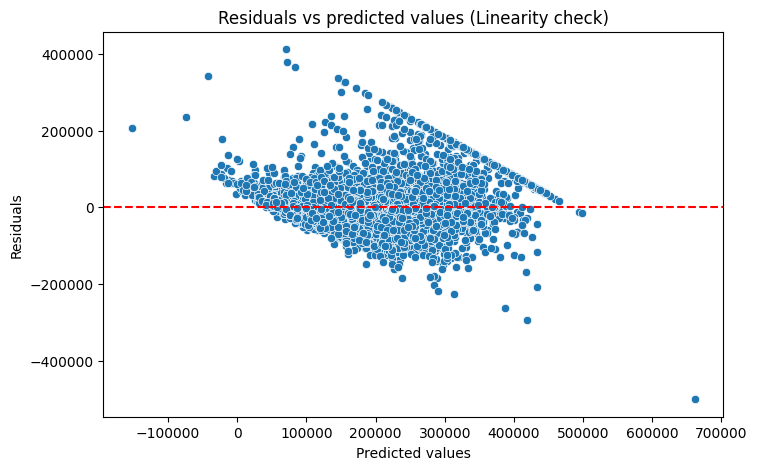

In [45]:
#Checking Linearity

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red',linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs predicted values (Linearity check)")
plt.show()

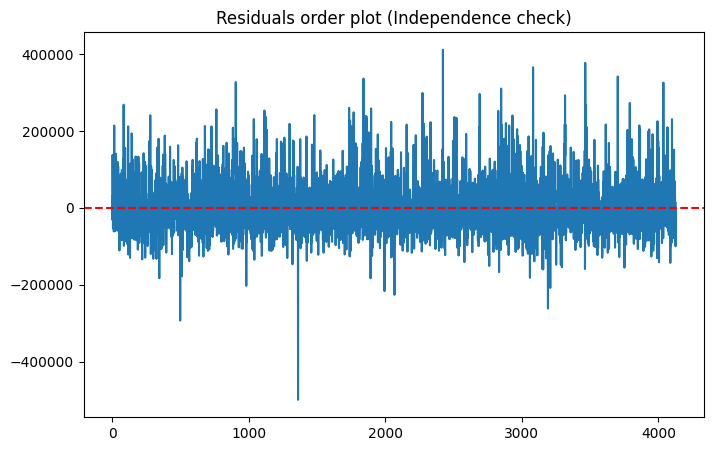

In [46]:
#Checking Independence

plt.figure(figsize=(8,5))
plt.plot(residuals.values)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals order plot (Independence check)")
plt.show()

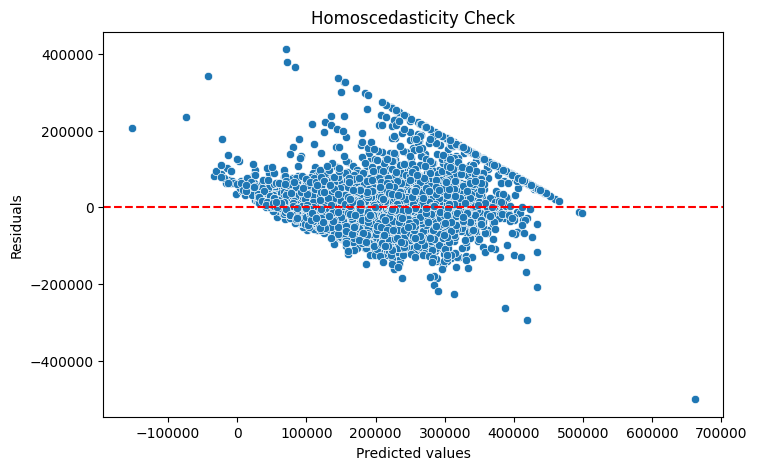

In [47]:
#Checking Homoscedasticity

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()

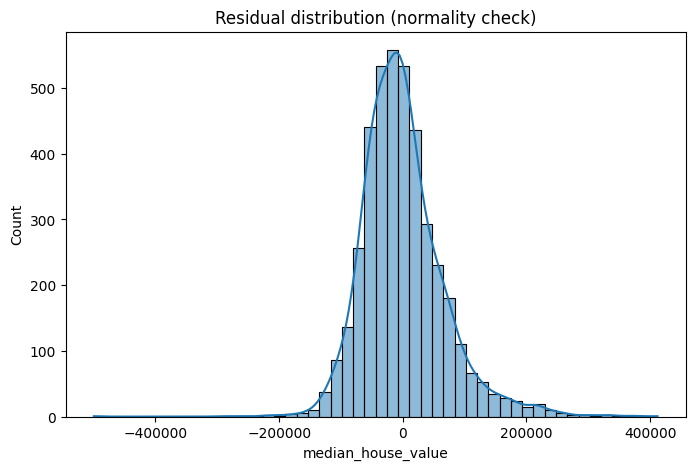

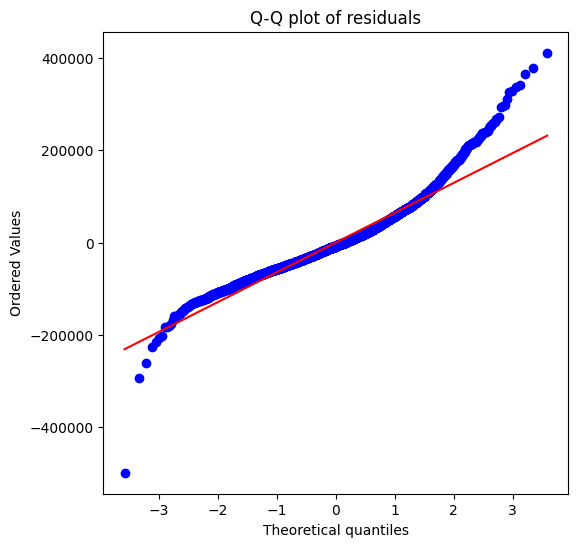

In [48]:
#Checking normality of residuals

plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residual distribution (normality check)")
plt.show()

#Q-Q plot

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()
